# <span style = "color : orange">Project - Used Cars Price Prediciton<span>

So called Second hand's car have a huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The main reason for this huge market is that when you buy a New Car and sale it just another day without any default on it, the price of car reduces by 30%.

There are also many frauds in the market who not only sale wrong but also they could mislead to wrong price.

So, here use this following dataset to Predict the price of used cars.

## Multiple Linear Regression

Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.

Let's see how to do that.

### Import necessary libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read car_data.csv and store it in a variable

In [44]:
df = pd.read_csv('car_data.csv')

### View the first five rows

In [45]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### View the last five rows

In [46]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


### Check the database info

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Gather the basic statistical information about the dataset

In [48]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Check the shape of the dataframe

In [49]:
df.shape

(301, 9)

### Check if there are any null values

In [50]:
df.isna().sum()#to get exact count

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [51]:
# There seems to be no null values

### Change the Year to number of years

In [52]:
current_year = 2021
df['Year'] = current_year - df['Year']

In [53]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,7,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,8,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,4,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,10,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,7,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#df['car_name'].unique()

In [ ]:
#df['car_name'].nunique()

### Drop Car_Name column

In [69]:
df.drop(columns = ['Car_Name'], inplace = True)

In [70]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,7,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,8,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,4,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,10,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,7,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Change the categorical variables into numerical by OneHotEncoding (Use pd.get_dummies)

In [71]:
newdf = pd.get_dummies(df, drop_first = True)
newdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7,3.35,5.59,27000,0,0,1,0,1
1,8,4.75,9.54,43000,0,1,0,0,1
2,4,7.25,9.85,6900,0,0,1,0,1
3,10,2.85,4.15,5200,0,0,1,0,1
4,7,4.60,6.87,42450,0,1,0,0,1


## <span style = "color: violet"> Visualization </span>

### Plot a pair plot

In [72]:
df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3032\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,-0.236141,0.047584,0.524342,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000


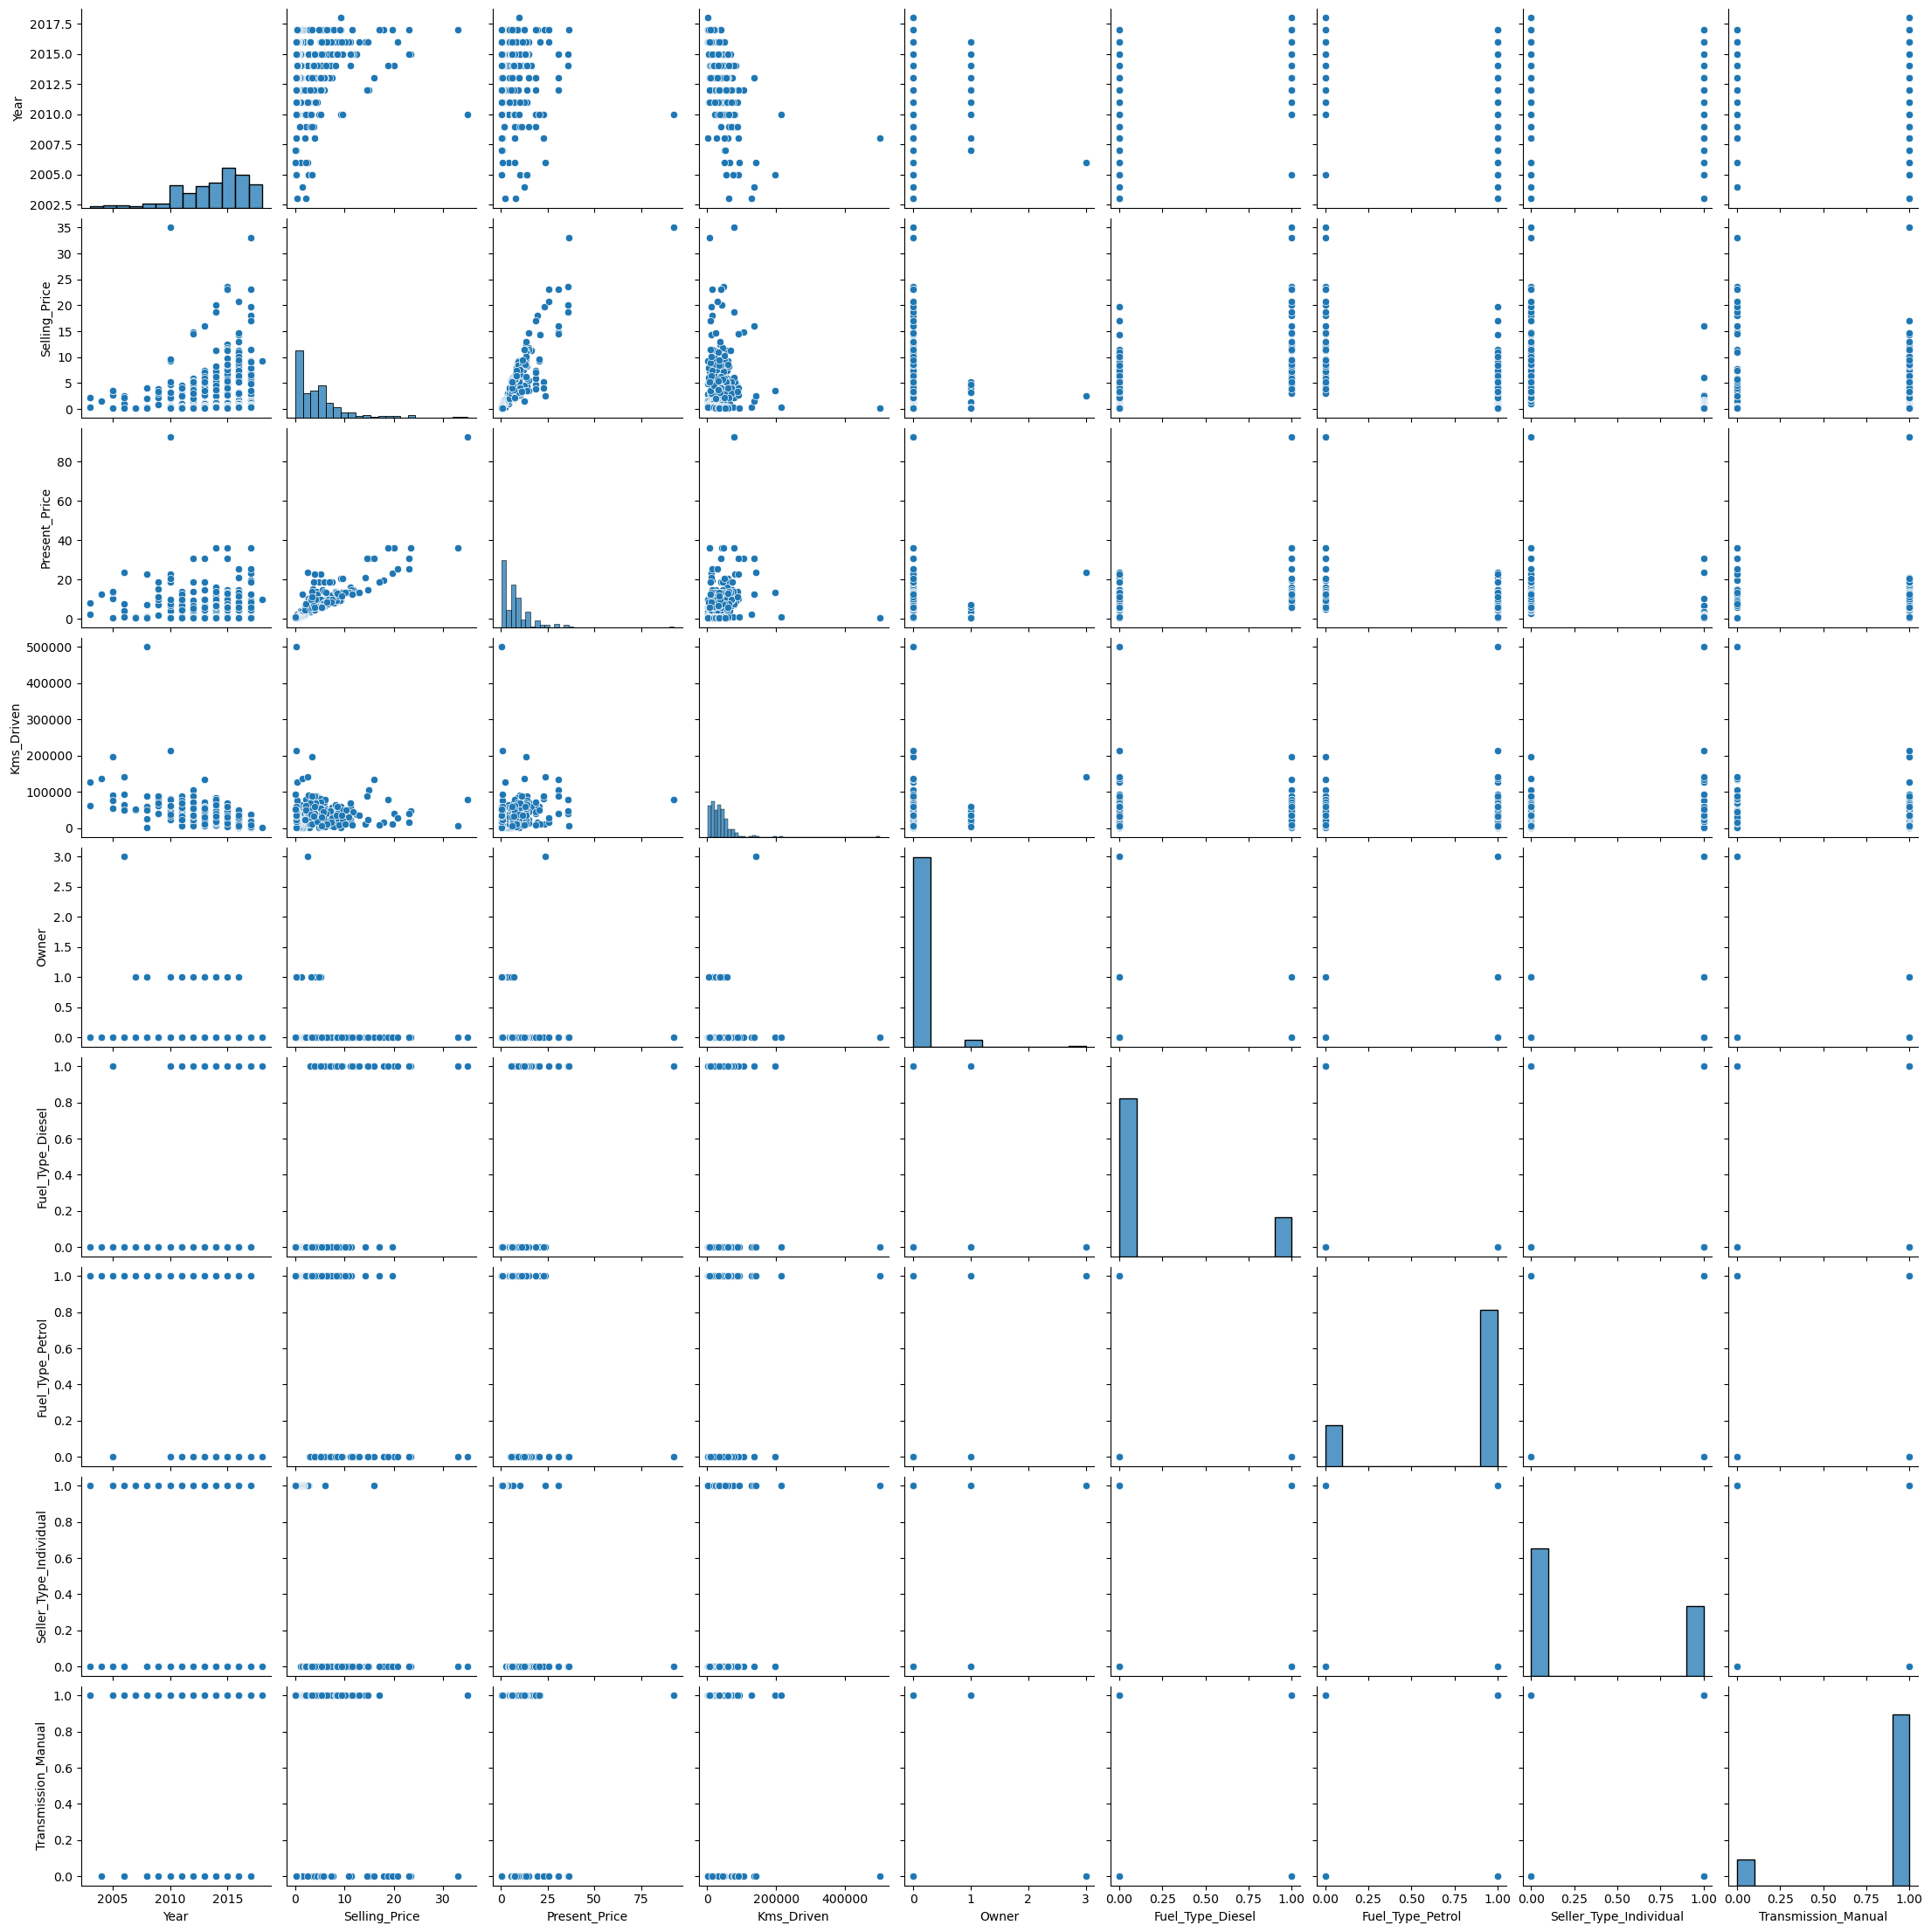

In [68]:
sns.pairplot(newdf)
plt.show()

### Plot a heatmap

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(newdf.corr(), annot = True)
plt.show()

### Assign X and y variables(independent and dependent variables)

In [ ]:
X = newdf[['Year', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']]
y = newdf['Selling_Price']

In [ ]:
x=df.drop(columns=['Selling_Price'])
y=df['Selling_Price']

### Standardise the data using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
xcolumns = X.columns.tolist()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns = xcolumns)
X.head()

### Check the shape of X and y

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
# The X variable must always be a 2 dimensional array and y, a one dimensional one

### Split the data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

### Check the size of X_train and X_test

In [73]:
X_train.size

1680

In [74]:
X_test.size

728

### Create a Linear Regression Model and Train it

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()


In [ ]:
#Train the model
model.fit(X_train, y_train)

### Check the score of our model

In [ ]:
model.score(X_train, y_train)

### Print the values of coefficents

In [55]:
model.coef_

array([ 1.10880882,  3.48462045, -0.18531247,  0.14693306,  0.98404131,
        0.1670001 , -0.53620483, -0.53711885])

In [58]:
model.predict(X_test)

array([-2.20155581e+00,  5.20093781e+00,  1.83832162e+00, -8.98859206e-01,
        2.91096511e+00,  3.58005037e+00,  4.20154597e+00,  3.73001420e+00,
        1.11945673e+00,  3.48556871e+00,  9.96537302e-01,  6.85644208e+00,
        8.56808452e+00,  5.40349197e+00,  2.29860423e+00,  7.37997897e+00,
        9.70057241e+00,  1.04020663e-02,  6.50490853e+00,  1.96427141e+00,
        1.99524414e+00,  9.22988048e+00,  4.16361242e+00,  1.04127941e+00,
        6.19266419e+00,  9.06177074e+00,  3.42739775e+00,  4.58660749e+00,
        1.53916579e+00,  1.75573166e+00,  7.44721460e+00,  1.02660221e+01,
        4.75474725e+00,  5.91883762e+00,  8.59866261e+00,  3.46305018e+00,
        3.43503323e+00,  1.07827743e+01,  2.53598047e+00,  7.56554959e+00,
        6.50424026e+00,  4.98308012e+00,  6.19880393e+00,  4.64814831e+00,
        4.11396459e+00,  1.08016285e+00,  2.03566220e+00,  3.90829932e+00,
        8.23105558e-01,  4.22432986e+00,  2.10141367e+01,  1.44164252e+00,
        4.28803598e+00,  

In [59]:
y_pred=model.predict(X_test)


In [ ]:
pd.DataFrame(model.coef_, index = X_test.columns, columns = ['Coefficeints'])

### Predict for X_test and store it in a variable

In [61]:
y_pred = model.predict(X_test)

### Evaluate the prediction with mean squared error and r2 score

In [62]:
from sklearn import metrics

In [63]:
print ('Mean Squared Error is: ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error is:  4.39078194992688


In [64]:
print('r2 Score is: ', metrics.r2_score(y_test, y_pred) )

r2 Score is:  0.8316982715837709


### Plot a scatterplot of actual vs predicted values

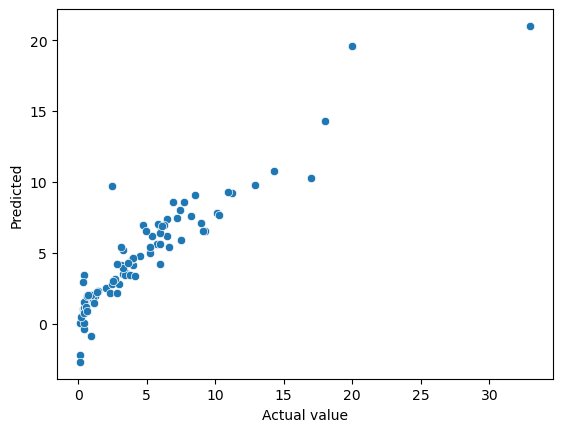

In [65]:
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Actual value')
plt.ylabel('Predicted')
plt.show()

### Plot a graph to check the accuracy of our prediction

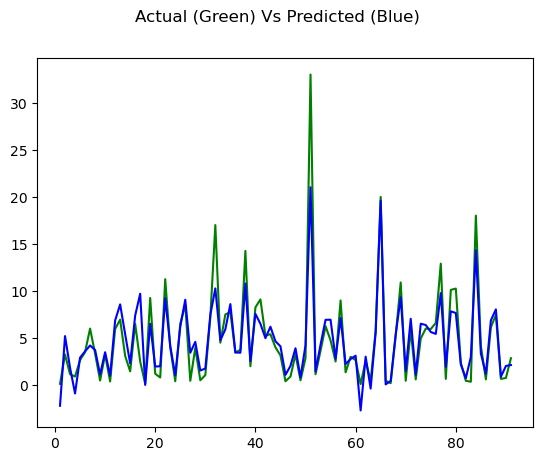

In [66]:
c = [i for i in range(1,92,1)]   #Creating an Index, 61 is used because we have a total of 60 data in our testing set
fig = plt.figure()
plt.plot(c,y_test, color = 'green') # Plotting y test
plt.plot(c,y_pred, color = 'blue') # Plotting predicted values
fig.suptitle('Actual (Green) Vs Predicted (Blue)') # Set title
plt.show()

***

# <center><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></center>